
#### Work and Schooling – LISS Core Study, Wave 15
##### Date of data collection: April 2022 and May 2022

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Raw Data

Read the dataset sav

In [32]:
data_workschooling_raw  = pd.read_spss('cw22o_EN_1.0p.sav')

In [33]:
data_workschooling_raw.shape

(5775, 420)

In [34]:
(data_workschooling_raw)

,nomem_encr,cw22o_m,cw22o000,cw22o525,cw22o002,cw22o003,cw22o001,cw22o005,cw22o006,cw22o008,...,cw22o496,cw22o497,cw22o498,cw22o499,cw22o500,cw22o501,cw22o502,cw22o503,cw22o504,cw22o505
0,800002.0,202204.0,Yes,paid employment,1976.0,45.0,Yes,mbo professional training program (intermediat...,NaN,other,...,3.0,4.0,2.0,2.0,3.0,06-04-2022,22:17:27,10-04-2022,21:50:47,344000.0
1,800009.0,202204.0,No,performs unpaid work while retaining unemploym...,1955.0,67.0,No,"hbo (higher professional education), institute...",NaN,"hbo (higher professional education, institutes...",...,2.0,5 Certainly yes,1 Certainly not,4.0,3.0,19-04-2022,14:02:32,19-04-2022,14:12:28,596.0
2,800015.0,202204.0,Yes,paid employment,1962.0,59.0,Yes,"academic education, master",NaN,"academic education, master",...,1 Certainly not,5 Certainly yes,3.0,3.0,1 Certainly not,25-04-2022,23:06:14,25-04-2022,23:27:33,1279.0
3,800028.0,202204.0,No,"is pensioner ([voluntary] early retirement, ol...",1950.0,71.0,No,"hbs (former pre-university education, US: seni...",NaN,academic education (including technical and ec...,...,1 Certainly not,5 Certainly yes,2.0,3.0,3.0,04-04-2022,14:01:03,04-04-2022,14:06:22,319.0
4,800057.0,202205.0,Yes,paid employment,1975.0,47.0,Yes,academic education (including technical and ec...,NaN,academic education (including technical and ec...,...,4.0,4.0,2.0,1 Certainly not,2.0,24-05-2022,15:35:49,24-05-2022,15:53:12,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,899891.0,202204.0,Yes,paid employment,1990.0,31.0,Yes,"academic education, master",NaN,"academic education, master",...,1 Certainly not,4.0,3.0,4.0,4.0,15-04-2022,16:18:10,15-04-2022,16:44:22,1572.0
5771,899908.0,202204.0,No,attends school or is studying,2004.0,17.0,No,primary school,NaN,"gymnasium, atheneum, lyceum (types of pre-univ...",...,1 Certainly not,3.0,2.0,2.0,3.0,18-04-2022,15:51:32,26-04-2022,16:46:41,694509.0
5772,899923.0,202204.0,Yes,paid employment,1963.0,58.0,Yes,"mulo, ulo, mavo (lower/intermediate secondary ...",NaN,"mulo, ulo, mavo (lower/intermediate secondary ...",...,1 Certainly not,5 Certainly yes,3.0,3.0,3.0,04-04-2022,12:23:16,04-04-2022,12:34:15,659.0
5773,899928.0,202204.0,No,performs voluntary work,1944.0,77.0,No,academic education (including technical and ec...,NaN,academic education (including technical and ec...,...,1 Certainly not,4.0,1 Certainly not,3.0,4.0,26-04-2022,10:24:06,26-04-2022,10:30:17,371.0


## Extracting root questions (columns):

- Root questions are: 

['nomem_encr','cw22o_m', 'cw22o000', 'cw22o001','cw22o002','cw22o003',
      'cw22o005', 'cw22o088', 'cw22o089', 'cw22o090', 'cw22o091', 
      'cw22o092','cw22o093', 'cw22o095', 'cw22o096', 'cw22o097', 
      'cw22o098','cw22o099', 'cw22o100', 'cw22o101', 'cw22o450', 
      'cw22o496','cw22o497', 'cw22o498', 'cw22o499', 'cw22o500','cw22o501',
      'cw22o502','cw22o503', 'cw22o504', 'cw22o505', 'cw22o522','cw22o525',]
  
Total of 33

some root questions are not related to loneliness but we keep them they are useful for identifying persons who are not completed the survey, we will remove 

- cw22o501: Starting date of the questionnaire
- cw22o502: Starting time of the questionnaire
- cw22o503: End date of the questionnaire
- cw22o504: End time of the questionnaire
- cw22o505: Duration in seconds.
- cw22o002: Respondent's year of birth 

In [35]:
root=['nomem_encr','cw22o_m', 'cw22o000', 'cw22o001','cw22o002',
      'cw22o003', 'cw22o005', 'cw22o088', 'cw22o089', 'cw22o090', 
      'cw22o091','cw22o092','cw22o093', 'cw22o095', 'cw22o096', 
      'cw22o097','cw22o098','cw22o099', 'cw22o100', 'cw22o101', 'cw22o450',
      'cw22o496','cw22o497', 'cw22o498', 'cw22o499', 'cw22o500','cw22o501',
      'cw22o502','cw22o503', 'cw22o504', 'cw22o505', 'cw22o522','cw22o525',]

###### Create new data frame from work and schooling data only with root questions (columns):

In [36]:
data_workschooling_root = data_workschooling_raw[root]

In [37]:
data_workschooling_root.shape

(5775, 33)

In [38]:
data_workschooling_root

,nomem_encr,cw22o_m,cw22o000,cw22o001,cw22o002,cw22o003,cw22o005,cw22o088,cw22o089,cw22o090,...,cw22o498,cw22o499,cw22o500,cw22o501,cw22o502,cw22o503,cw22o504,cw22o505,cw22o522,cw22o525
0,800002.0,202204.0,Yes,Yes,1976.0,45.0,mbo professional training program (intermediat...,Yes,No,No,...,2.0,2.0,3.0,06-04-2022,22:17:27,10-04-2022,21:50:47,344000.0,No,paid employment
1,800009.0,202204.0,No,No,1955.0,67.0,"hbo (higher professional education), institute...",No,No,No,...,1 Certainly not,4.0,3.0,19-04-2022,14:02:32,19-04-2022,14:12:28,596.0,Yes,performs unpaid work while retaining unemploym...
2,800015.0,202204.0,Yes,Yes,1962.0,59.0,"academic education, master",Yes,No,No,...,3.0,3.0,1 Certainly not,25-04-2022,23:06:14,25-04-2022,23:27:33,1279.0,No,paid employment
3,800028.0,202204.0,No,No,1950.0,71.0,"hbs (former pre-university education, US: seni...",No,No,No,...,2.0,3.0,3.0,04-04-2022,14:01:03,04-04-2022,14:06:22,319.0,Yes,"is pensioner ([voluntary] early retirement, ol..."
4,800057.0,202205.0,Yes,Yes,1975.0,47.0,academic education (including technical and ec...,Yes,No,No,...,2.0,1 Certainly not,2.0,24-05-2022,15:35:49,24-05-2022,15:53:12,1043.0,No,paid employment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,899891.0,202204.0,Yes,Yes,1990.0,31.0,"academic education, master",Yes,No,No,...,3.0,4.0,4.0,15-04-2022,16:18:10,15-04-2022,16:44:22,1572.0,No,paid employment
5771,899908.0,202204.0,No,No,2004.0,17.0,primary school,No,No,No,...,2.0,2.0,3.0,18-04-2022,15:51:32,26-04-2022,16:46:41,694509.0,No,attends school or is studying
5772,899923.0,202204.0,Yes,Yes,1963.0,58.0,"mulo, ulo, mavo (lower/intermediate secondary ...",Yes,No,No,...,3.0,3.0,3.0,04-04-2022,12:23:16,04-04-2022,12:34:15,659.0,No,paid employment
5773,899928.0,202204.0,No,No,1944.0,77.0,academic education (including technical and ec...,No,No,No,...,1 Certainly not,3.0,4.0,26-04-2022,10:24:06,26-04-2022,10:30:17,371.0,Yes,performs voluntary work



### Matching with Ids from Ivan Zhirnov's data
#### Filter the rows in the Work and Schooling wave data frame that have IDs in the Health - Social Integration and Leisure
Identifying  the complete surveys that are associated with these ids
ids from 'wave15_health-sil-back_nomem_encr.csv' data

First import ids from 'wave15_health-sil-back_nomem_encr.csv' data

In [39]:
ids=pd.read_csv('wave15_health-sil-back_nomem_encr.csv')
ids

,nomem_encr
0,800001
1,800002
2,800009
3,800015
4,800028
...,...
5346,899794
5347,899891
5348,899908
5349,899923


In [40]:
ids=pd.read_csv('wave15_health-sil-back_nomem_encr.csv')

print("\nPrevious ids from Work and Schooling wave 15 data is  ",data_workschooling_root.shape[0])
print("ids from 'wave15_health-sil-back_nomem_encr.csv' data is  ",ids.shape[0])


Previous ids from Work and Schooling wave 15 data is   5775
ids from 'wave15_health-sil-back_nomem_encr.csv' data is   5351


###### So let's filter the rows in the first data frame that have IDs in the 'wave15_health-sil-back_nomem_encr.csv' data

In [41]:
# first we have to convert ids data frame to list
id_list = ids['nomem_encr'].tolist()

# filter the rows in the Work and Schooling wave 15 data frame that have IDs in the 'Health - Social Integration and Leisure'
workschooling_filtered_data = data_workschooling_root[data_workschooling_root['nomem_encr'].isin(id_list)]

In [42]:
workschooling_filtered_data.shape

(4747, 33)

#### Missing Values

In [43]:
workschooling_filtered_data.isnull().sum().sum()

682

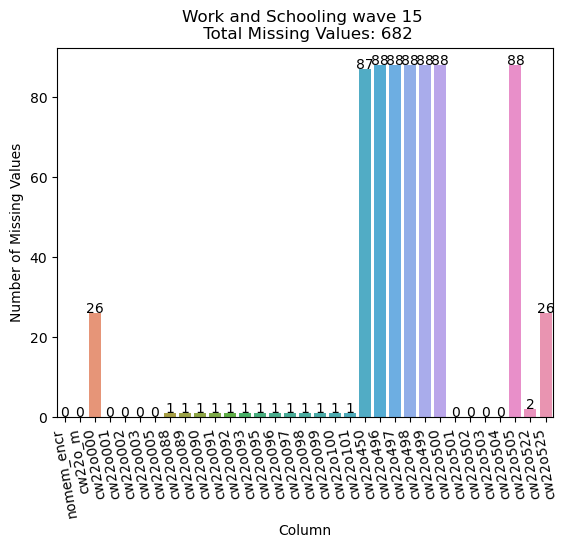

In [44]:
ax = sns.barplot(x=workschooling_filtered_data.columns, y=workschooling_filtered_data.isnull().sum())
plt.xticks(rotation=100)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, workschooling_filtered_data.isnull().sum()[i], ha="center")
ax.set_xlabel('Column')
ax.set_ylabel('Number of Missing Values')
# Display the total number of missing values on top of the graph
total_missing_values = workschooling_filtered_data.isnull().sum().sum()
ax.set_title(f'Work and Schooling wave 15 \n Total Missing Values: {total_missing_values}')
plt.show()

#### Data type

In [45]:
workschooling_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 5773
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   nomem_encr  4747 non-null   float64 
 1   cw22o_m     4747 non-null   float64 
 2   cw22o000    4721 non-null   category
 3   cw22o001    4747 non-null   category
 4   cw22o002    4747 non-null   float64 
 5   cw22o003    4747 non-null   float64 
 6   cw22o005    4747 non-null   category
 7   cw22o088    4746 non-null   category
 8   cw22o089    4746 non-null   category
 9   cw22o090    4746 non-null   category
 10  cw22o091    4746 non-null   category
 11  cw22o092    4746 non-null   category
 12  cw22o093    4746 non-null   category
 13  cw22o095    4746 non-null   category
 14  cw22o096    4746 non-null   category
 15  cw22o097    4746 non-null   category
 16  cw22o098    4746 non-null   category
 17  cw22o099    4746 non-null   category
 18  cw22o100    4746 non-null   category
 19  cw22o1

### Matching ids from Heath, Social Integration and Leisure, Income and Housing data
#### Compere rows with ids from Carmelo  group H_S_I_H 

First import ids from 'Matched_H_S_I_H.csv' data

In [46]:
H_S_I_H_ids=pd.read_csv('Matched_H_S_I_H.csv')
H_S_I_H_ids

,nomem_encr
0,800002
1,800015
2,800127
3,800156
4,800170
...,...
3302,899773
3303,899794
3304,899891
3305,899923


In [47]:
# first we have to convert ids data frame to H_S_I_H_ids csv file
id_list = H_S_I_H_ids['nomem_encr'].tolist()

# filter the rows in the Work and Schooling wave 15 data frame that have IDs in the 'H_S_I_H_ids'
workschooling_matched= workschooling_filtered_data[workschooling_filtered_data['nomem_encr'].isin(id_list)]

In [48]:
print("\nPrevious ids from Work and Schooling wave 15 data is  ",workschooling_filtered_data.shape)
print("ids from H_S_I_H_ids is  ",H_S_I_H_ids.shape)
print("\nfinaly we have  ",workschooling_matched.shape[0],'  rows')


Previous ids from Work and Schooling wave 15 data is   (4747, 33)
ids from H_S_I_H_ids is   (3307, 1)

finaly we have   3066   rows


In [49]:
workschooling_matched.shape

(3066, 33)

### Data Types in the Data Frame
Columns with data type 'float64': 
['nomem_encr', 'cw22o_m', 'cw22o002', 'cw22o003', 'cw22o505']

Columns with data type 'object':
['cw22o501', 'cw22o502', 'cw22o503', 'cw22o504']

Columns with data type 'category':
['cw22o000', 'cw22o001', 'cw22o005', 'cw22o088', 'cw22o089', 'cw22o090', 'cw22o091', 'cw22o092', 'cw22o093', 'cw22o095', 'cw22o096', 'cw22o097', 'cw22o098', 'cw22o099', 'cw22o100', 'cw22o101', 'cw22o450', 'cw22o496', 'cw22o497', 'cw22o498', 'cw22o499', 'cw22o500', 'cw22o522', 'cw22o525']

In [50]:
workschooling_matched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3066 entries, 0 to 5773
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   nomem_encr  3066 non-null   float64 
 1   cw22o_m     3066 non-null   float64 
 2   cw22o000    3048 non-null   category
 3   cw22o001    3066 non-null   category
 4   cw22o002    3066 non-null   float64 
 5   cw22o003    3066 non-null   float64 
 6   cw22o005    3066 non-null   category
 7   cw22o088    3065 non-null   category
 8   cw22o089    3065 non-null   category
 9   cw22o090    3065 non-null   category
 10  cw22o091    3065 non-null   category
 11  cw22o092    3065 non-null   category
 12  cw22o093    3065 non-null   category
 13  cw22o095    3065 non-null   category
 14  cw22o096    3065 non-null   category
 15  cw22o097    3065 non-null   category
 16  cw22o098    3065 non-null   category
 17  cw22o099    3065 non-null   category
 18  cw22o100    3065 non-null   category
 19  cw22o1

### Remove columns that are not related to loneliness

We can to reduce columns from 33to 27 because: <br>
From the remaining 33 questions the following are date and time related so these below are not related to loneliness:

- cw22o501: Starting date of the questionnaire
- cw22o502: Starting time of the questionnaire
- cw22o503: End date of the questionnaire
- cw22o504: End time of the questionnaire
- cw22o505: Duration in seconds.

And also cw22o002: Respondent's year of birth has to be removed because there is also a question asks respondents age  'cw22o003 Respondent's age'

let's remove the following columns ['cw22o501','cw22o502','cw22o503','cw22o504','cw22o505','cw22o002'] 

In [51]:
workschooling_final = workschooling_matched.drop(['cw22o501','cw22o502','cw22o503','cw22o504','cw22o505','cw22o002'], axis=1)

In [52]:
workschooling_final.shape

(3066, 27)

### Visualisation of missing values for new data frame

Dealing Missing Values

In [53]:
total_missing_values=workschooling_final.isnull().sum().sum()
print('We have ',total_missing_values,"missing values")

We have  326 missing values


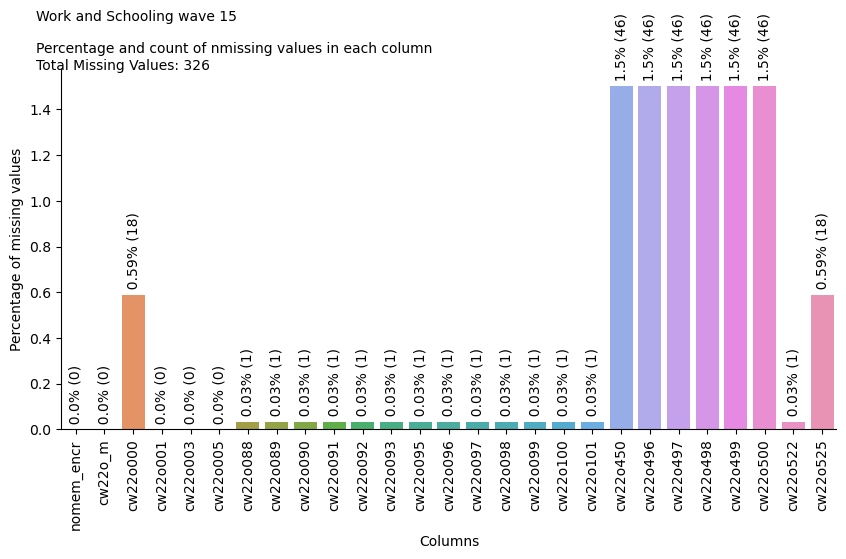

In [54]:
missing_percentage = (workschooling_final.isnull().sum() / len(workschooling_final)) * 100
missing_count = workschooling_final.isnull().sum()


plt.figure(figsize=(10,6))
ax = sns.barplot(x=missing_percentage.index, y=missing_percentage.values, linewidth=0.5)
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')

sns.despine(top=True, right=True)

plt.xticks(rotation=90)
for i in range(len(missing_percentage)):
    ax.text(i, missing_percentage[i],'  ' +str(round(missing_percentage[i], 2)) + '% (' + str(missing_count[i]) + ')', ha='center', rotation=90)

plt.subplots_adjust(top=0.9, bottom=0.3)

plt.figtext(0.1, 0.9, f'Work and Schooling wave 15\n\nPercentage and count of nmissing values in each column \nTotal Missing Values: {total_missing_values}', fontsize=10,)


plt.show()


### Data Types in the Data Frame
Columns with data type 'float64': 
['nomem_encr', 'cw22o_m','cw22o003'] <br>
Columns with data type 'category':
['cw22o000', 'cw22o001', 'cw22o005', 'cw22o088', 'cw22o089', 'cw22o090', 'cw22o091', 'cw22o092', 'cw22o093', 'cw22o095', 'cw22o096', 'cw22o097', 'cw22o098', 'cw22o099', 'cw22o100', 'cw22o101', 'cw22o450', 'cw22o496', 'cw22o497', 'cw22o498', 'cw22o499', 'cw22o500', 'cw22o522', 'cw22o525']

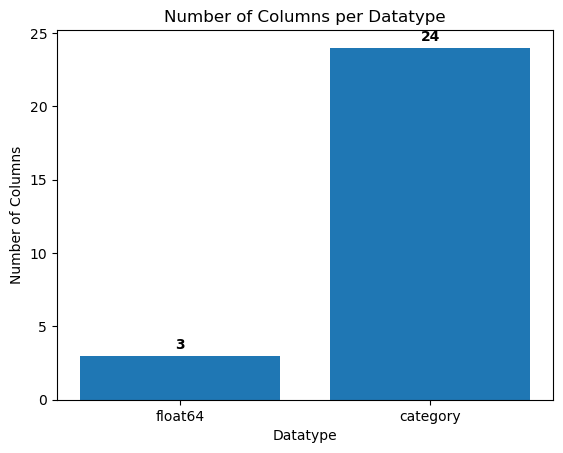

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'float64':  ['nomem_encr', 'cw22o_m','cw22o003'],
    'category': ['cw22o000', 'cw22o001', 'cw22o005', 'cw22o088', 'cw22o089', 'cw22o090', 'cw22o091', 'cw22o092', 'cw22o093', 'cw22o095', 'cw22o096', 'cw22o097', 'cw22o098', 'cw22o099', 'cw22o100', 'cw22o101', 'cw22o450', 'cw22o496', 'cw22o497', 'cw22o498', 'cw22o499', 'cw22o500', 'cw22o522', 'cw22o525']
}


counts = {}
for dtype, cols in data.items():
    counts[dtype] = len(cols)

# Create a bar plot
plt.bar(counts.keys(), counts.values())
plt.title('Number of Columns per Datatype')
plt.xlabel('Datatype')
plt.ylabel('Number of Columns')
for i, v in enumerate(counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

### Accessing the questions using column's code code

In [56]:
workschooling_question_desc= pd.read_csv('questions.csv',header=None,names=['Column Names','Questions'])
workschooling_question_desc.shape

(33, 2)

In [57]:
workschooling_question_desc

,Column Names,Questions
0,nomem_encr,Number of household member encrypted
1,cw22o_m,Year and month of the field work period
2,cw22o000,Respondent has paid work (according to househo...
3,cw22o002,Respondent's year of birth
4,cw22o525,primary occupation
5,cw22o003,Respondent's age
6,cw22o001,Does respondent have paid work?
7,cw22o005,What is the highest level of education that yo...
8,cw22o088,Please indicate which of the following stateme...
9,cw22o089,Please indicate which of the following stateme...


In [58]:
column_name = "cw22o000"
question = workschooling_question_desc.loc[workschooling_question_desc['Column Names'] == column_name, 'Questions'].iloc[0]
print(column_name,":   ",question)

cw22o000 :    Respondent has paid work (according to household box data)





### Column Names	=>  Questions

- nomem_encr:   Number of household member encrypted
- cw22o_m:   Year and month of the field work period
- cw22o000:	Respondent has paid work (according to household box data)
- cw22o525:	primary occupation
- cw22o003:	Respondent's age
- cw22o001:	Does respondent have paid work?
- cw22o005:	What is the highest level of education that you have completed with diploma or certificate?
- cw22o088:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I perform paid work (even if is it just for one or several hours per week or for a brief period)
- cw22o089:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I am not working now, but have performed paid work in the past
- cw22o090:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I perform unpaid work while retaining my benefit or allowance
- cw22o091:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I am looking for work following the loss of my previous job
- cw22o092:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I have performed paid work, but am released from the obligation to find a new job following the loss of my previous job
- cw22o093:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I am a first-time job seeker
- cw22o095:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I am a pupil / student
- cw22o096:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I take care of the household
- cw22o097:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I live off private means
- cw22o098:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I have taken early retirement or “functioneel leeftijdsontslag” (FLO)
- cw22o099:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I am a pensioner
- cw22o100:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I am partly or wholly disabled for work
- cw22o101:	Please indicate which of the following statements apply to your situation. Try to be as thorough as you can. - I perform voluntary work
- cw22o522:	long_time_unemployed
- cw22o450:	Do you provide informal care?
- cw22o496:	Was it difficult to answer the questions?
- cw22o497:	Were the questions sufficiently clear?
- cw22o498:	Did the questionnaire get you thinking about things?
- cw22o499:	Was it an interesting subject?
- cw22o500:	Did you enjoy answering the questions?